# TASK 1a: Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
##loading data
Transfusion_data=pd.read_csv('transfusion.data.csv')

In [3]:
Transfusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
Transfusion_data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [5]:
Transfusion_data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

EXPLORATORY ANALYSIS


In [6]:
Transfusion_data.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

In [7]:
## counting missing variables
Transfusion_data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
## summary statistics
## Distribution of numeric variables
numeric_vars=['Recency (months)', 'Frequency (times)',
              'Monetary (c.c. blood)', 'Time (months)'
             ]

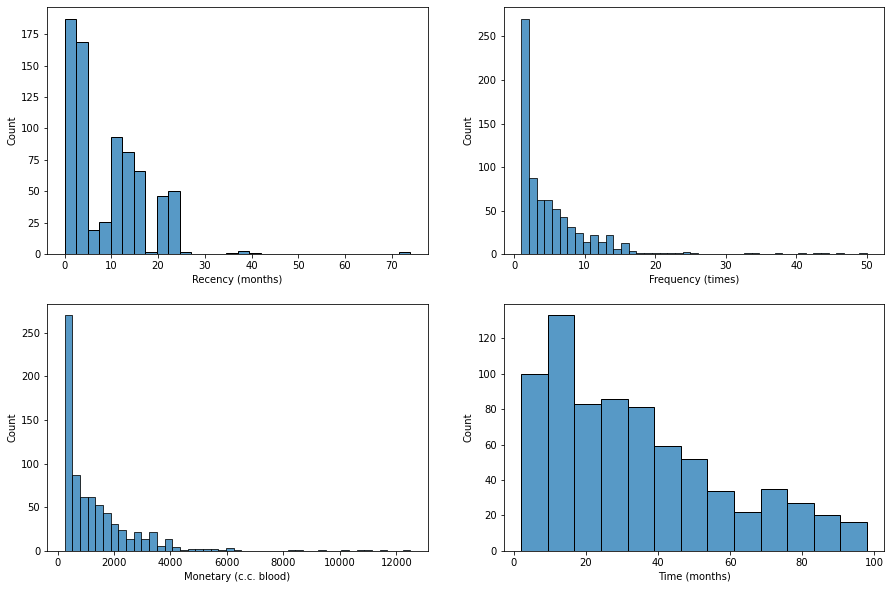

In [9]:
## plotting side by side(histogram)

plt.figure(figsize=(15,10))
for plot in range(len(numeric_vars)):
    plt.subplot(2, 2, plot+1)
    sns.histplot(Transfusion_data[numeric_vars[plot]])
    
plt.show()

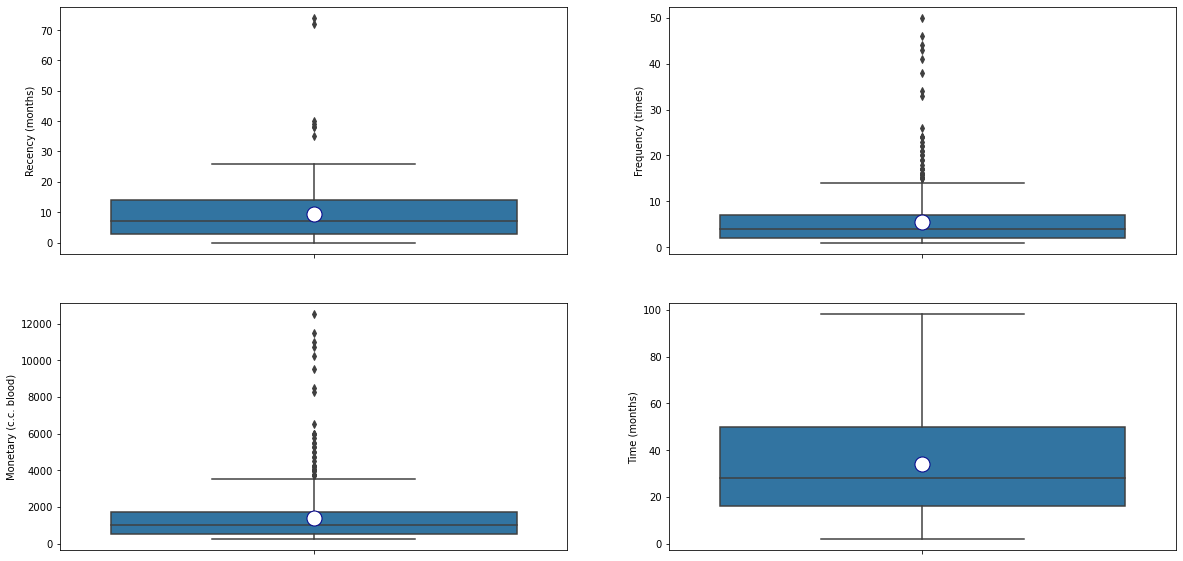

In [10]:
##for boxplot

plt.figure(figsize=(20,10))
for plot in range(len(numeric_vars)):
    plt.subplot(2, 2, plot+1)
    sns.boxplot(y=Transfusion_data[numeric_vars[plot]], showmeans= True, 
                meanprops={"marker": "o", 'markerfacecolor': 'white','markeredgecolor': 'darkblue', 'markersize':'15'
    })
    
plt.show()

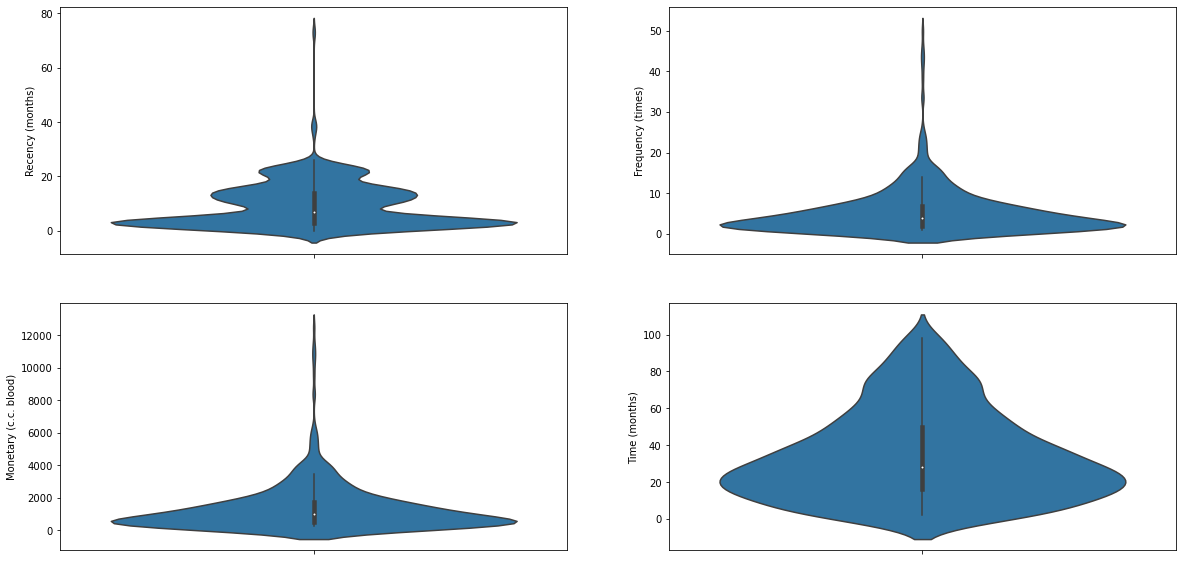

In [11]:
##for violinplot

plt.figure(figsize=(20,10))
for plot in range(len(numeric_vars)):
    plt.subplot(2, 2, plot+1)
    sns.violinplot(y=Transfusion_data[numeric_vars[plot]])
    
plt.show()

<Figure size 3600x720 with 0 Axes>

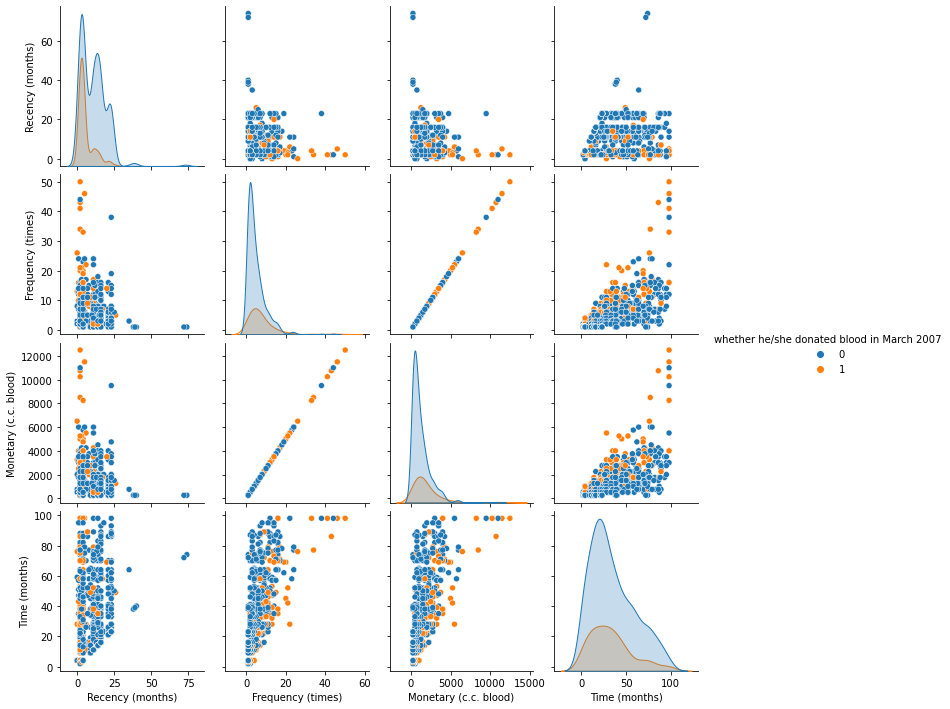

In [12]:
##scatter plot matrix
plt.figure(figsize=(50,10))
sns.pairplot(Transfusion_data[['Recency (months)', 'Frequency (times)',
              'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007'
]], hue ='whether he/she donated blood in March 2007')

plt.show()

In [13]:
##Exploring non-numerical variable
Transfusion_data['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [14]:
Transfusion_data['whether he/she donated blood in March 2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: whether he/she donated blood in March 2007, dtype: float64

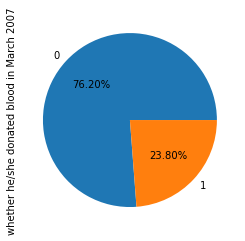

In [15]:
Transfusion_data['whether he/she donated blood in March 2007'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

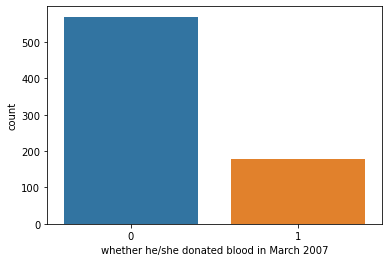

In [16]:
sns.countplot(x=Transfusion_data['whether he/she donated blood in March 2007'])
plt.show()

FEATURE ENGINEERING

In [17]:
##splitting data into training and test set

In [18]:
X,y = Transfusion_data.drop(['whether he/she donated blood in March 2007'], axis=1), Transfusion_data['whether he/she donated blood in March 2007']

In [19]:
X

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                   2                 50                  12500             98
1                   0                 13                   3250             28
2                   1                 16                   4000             35
3                   2                 20                   5000             45
4                   1                 24                   6000             77
..                ...                ...                    ...            ...
743                23                  2                    500             38
744                21                  2                    500             52
745                23                  3                    750             62
746                39                  1                    250             39
747                72                  1                    250             72

[748 rows x 4 columns]

In [20]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=62,
    stratify=y
)

In [22]:
X_train.shape, X_test.shape

((598, 4), (150, 4))

In [23]:
## counting unique values in the y variable
Transfusion_data['whether he/she donated blood in March 2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: whether he/she donated blood in March 2007, dtype: float64

# Model 1

# Logistic Regression Model

In [24]:
from sklearn import set_config
set_config(display='diagram')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
##normalizing and Building pipeline for the model
logit_model=Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=0))
])
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=0))])

In [27]:
logit_pred= logit_model.predict(X_test)

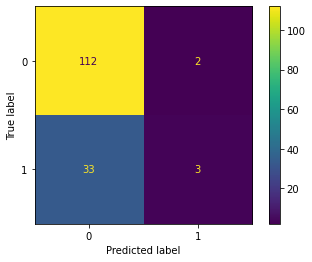

In [28]:
cm=confusion_matrix(y_test, logit_pred, labels=logit_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_model.classes_)
disp.plot()
plt.show()

In [29]:
##calculating the accuracy
logit_model.score(X_test, y_test)

0.7666666666666667

In [30]:
115/(115+35)

0.7666666666666667

In [31]:
print(classification_report(y_test, logit_pred, labels=logit_model.classes_))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       114
           1       0.60      0.08      0.15        36

    accuracy                           0.77       150
   macro avg       0.69      0.53      0.51       150
weighted avg       0.73      0.77      0.69       150



### Hyperparameter Optimization

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param = {'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 1000]}

gs=GridSearchCV(logit_model, param_grid=param, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                           10, 50, 100, 1000]},
             verbose=1)

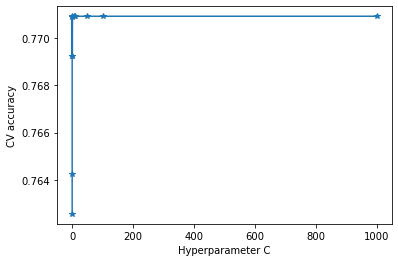

In [34]:
plt.plot(param['classifier__C'],gs.cv_results_['mean_test_score'], '*-')
plt.xlabel('Hyperparameter C')
plt.ylabel('CV accuracy') # CV = cross validation
plt.show()

In [35]:
gs.best_params_

{'classifier__C': 1}

In [36]:
gs.score(X_test, y_test)

0.7666666666666667

In [37]:
## coeff of x (absolute value) showing how well they could affect the y values
logit_model.named_steps['classifier'].coef_

array([[-0.71279693,  0.38759947,  0.38759947, -0.61497101]])

In [38]:
X.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'],
      dtype='object')

# Using Decision Tree model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DT_model=Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=20))
])
DT_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=20))])

In [42]:
DT_pred= DT_model.predict(X_test)

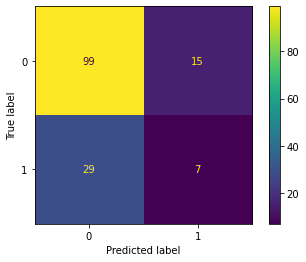

In [43]:
cm2=confusion_matrix(y_test, DT_pred, labels=DT_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=DT_model.classes_)
disp.plot()
plt.show()

In [44]:
DT_model.score(X_test, y_test)

0.7066666666666667

In [172]:
print(classification_report(y_test, DT_pred, labels=DT_model.classes_))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       114
           1       0.32      0.19      0.24        36

    accuracy                           0.71       150
   macro avg       0.55      0.53      0.53       150
weighted avg       0.66      0.71      0.68       150



# USING KNN-Using distance between 2 points

In [47]:
from sklearn.neighbors import KNeighborsClassifier 

In [48]:
KNN_model=Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_jobs=-1))
])
KNN_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_jobs=-1))])

In [49]:
KNN_pred= KNN_model.predict(X_test)

In [50]:
cm3=confusion_matrix(y_test, KNN_pred, labels=KNN_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=KNN_model.classes_)
disp.plot()
plt.show()

In [51]:
KNN_model.score(X_test, y_test)

0.78

In [52]:
print(classification_report(y_test, KNN_pred, labels=KNN_model.classes_))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       114
           1       0.57      0.33      0.42        36

    accuracy                           0.78       150
   macro avg       0.69      0.63      0.64       150
weighted avg       0.76      0.78      0.76       150



In [53]:
##Hyperparameter optimization- using grid search approach

In [54]:
n_neighbor_grid=range(1,25)
parameter_grid = {'classifier__n_neighbors' : n_neighbor_grid}

knn_cv = GridSearchCV(KNN_model, parameter_grid, n_jobs=-1, verbose=1)
knn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'classifier__n_neighbors': range(1, 25)},
             verbose=1)

In [55]:
knn_cv.best_params_

{'classifier__n_neighbors': 24}

In [56]:
cv_results=knn_cv.cv_results_['mean_test_score']

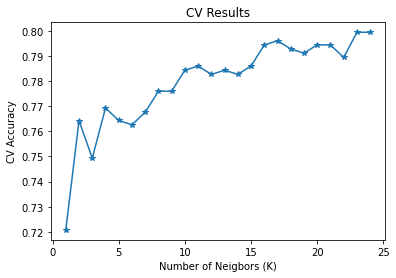

In [57]:
plt.plot(range(1,25), cv_results, '*-' )
plt.xlabel('Number of Neigbors (K)')
plt.ylabel('CV Accuracy')
plt.title('CV Results')
plt.show()

In [58]:
## predicting with the best K
KNN_predict_new = knn_cv.best_estimator_.predict(X_test)

In [59]:
print(classification_report(y_test, KNN_predict_new))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       114
           1       0.63      0.33      0.44        36

    accuracy                           0.79       150
   macro avg       0.72      0.64      0.65       150
weighted avg       0.77      0.79      0.77       150



In [60]:
cm4=confusion_matrix(y_test, KNN_predict_new, labels=KNN_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=KNN_model.classes_)
disp.plot()
plt.show() 

# Model 2 : Neural Network

In [61]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [62]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: requests<3,>=2.21.0 in c:\users\hp\anaconda3\lib\site-packages (from tensorboard<2.11,>=2.10->tensorflow) (2.26.0)



In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers

In [64]:
X_train_nn = X_train 
X_test_nn = X_test

In [65]:
y_train_nn = y_train
y_test_nn = y_test

In [66]:
X_train_nn.shape[1]

4

In [67]:
##setting seed to prevent the accuracy from changing
import random

In [68]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [69]:
set_seed()
model = keras.Sequential([
    keras.Input(shape = (X_train_nn.shape[1],), name='Input_layer'),
    layers.Dense(units=100, activation='relu', name='hidden_layer'),
    layers.Dense(units=1, activation='sigmoid')
], name= 'initial_model')
model.summary()

Model: "initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 100)               500       
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [70]:
##compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [71]:
history=model.fit(X_train_nn, y_train_nn,
                 batch_size=32,
                 epochs= 15,
                 verbose=1,
                 validation_split=0.2)

Epoch 1/15
15/15 [==============================] - 2s 30ms/step - loss: 33.3177 - accuracy: 0.4812 - val_loss: 10.1051 - val_accuracy: 0.7833
Epoch 2/15
15/15 [==============================] - 0s 4ms/step - loss: 8.3142 - accuracy: 0.7155 - val_loss: 4.2352 - val_accuracy: 0.4250
Epoch 3/15
15/15 [==============================] - 0s 5ms/step - loss: 2.0363 - accuracy: 0.6883 - val_loss: 0.9169 - val_accuracy: 0.7667
Epoch 4/15
15/15 [==============================] - 0s 6ms/step - loss: 0.9661 - accuracy: 0.7092 - val_loss: 0.9554 - val_accuracy: 0.6833
Epoch 5/15
15/15 [==============================] - 0s 5ms/step - loss: 0.8953 - accuracy: 0.7197 - val_loss: 1.0288 - val_accuracy: 0.7917
Epoch 6/15
15/15 [==============================] - 0s 4ms/step - loss: 0.9984 - accuracy: 0.7197 - val_loss: 0.9816 - val_accuracy: 0.7750
Epoch 7/15
15/15 [==============================] - 0s 5ms/step - loss: 0.8939 - accuracy: 0.7113 - val_loss: 0.8391 - val_accuracy: 0.7417
Epoch 8/15
15/15 

In [72]:
## evaluating the model
model.evaluate(X_test_nn, y_test_nn)

5/5 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.6667


[0.9531362056732178, 0.6666666865348816]

In [73]:
##predicting the model
model.predict(X_test_nn)

5/5 [==============================] - 0s 3ms/step


array([[9.13350582e-01],
       [4.91033308e-02],
       [1.00000000e+00],
       [9.31889296e-01],
       [6.35672808e-01],
       [6.14917457e-01],
       [2.85068363e-01],
       [3.51802289e-01],
       [7.91338086e-02],
       [9.69112992e-01],
       [7.79355347e-01],
       [1.00000000e+00],
       [6.41063988e-01],
       [9.96029258e-01],
       [2.00695395e-01],
       [6.14917457e-01],
       [2.11411994e-02],
       [7.56525040e-01],
       [9.57759380e-01],
       [6.14917457e-01],
       [4.82636869e-01],
       [3.81627411e-01],
       [4.27582145e-01],
       [7.86296502e-02],
       [9.31641221e-01],
       [2.75914352e-02],
       [2.85068363e-01],
       [9.79189426e-02],
       [9.75661337e-01],
       [9.85629857e-01],
       [8.23114216e-01],
       [3.20384771e-01],
       [2.99394488e-01],
       [6.14917457e-01],
       [5.39840639e-01],
       [5.39840639e-01],
       [8.96711290e-01],
       [7.86296502e-02],
       [9.18158233e-01],
       [1.15447037e-01],


In [74]:
##converting the above probability values to 0 and 1
nn_pred=np.round(model.predict(X_test_nn))

5/5 [==============================] - 0s 1ms/step


In [75]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.92      0.61      0.74       114
           1       0.41      0.83      0.55        36

    accuracy                           0.67       150
   macro avg       0.66      0.72      0.64       150
weighted avg       0.80      0.67      0.69       150



# comparing the KNN model and Neural network model

In [76]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [77]:
def evaluate_model(y_true, y_pred, model_name):
    
    accuracy=accuracy_score(y_true=y_true, y_pred=y_pred)
    precision=precision_score(y_true=y_true, y_pred=y_pred)
    recall=recall_score(y_true=y_true, y_pred=y_pred)
    f1=f1_score(y_true=y_true, y_pred=y_pred)
    
    scored_df = pd.DataFrame({
        model_name: [accuracy, precision, recall, f1]
    }, index= ['Accuracy', 'Precision', 'Recall', 'F1'])
    
    return scored_df

In [78]:
knn_pred_test= evaluate_model(y_test, KNN_predict_new, 'K-Nearest Neighbors')
nn_pred_test = evaluate_model(y_test, nn_pred, 'Neural Networks')

In [79]:
pd.concat([knn_pred_test, nn_pred_test], axis=1)

K-Nearest Neighbors  Neural Networks
Accuracy              0.793333         0.666667
Precision             0.631579         0.405405
Recall                0.333333         0.833333
F1                    0.436364         0.545455

# TASK 2: Association Rules Minning

In [80]:
##Identifying frequently purchased items in a UK-based online retail store
##importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [81]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [82]:
##importing the data
online_retail=pd.read_excel('Online Retail.xlsx')

In [83]:
online_retail.info()
online_retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [84]:
##checking the list of countries present
online_retail.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

##Data cleaning

In [85]:
#focusing only on transactions in Germany alone.
online_retail[online_retail.Country.isin(['Germany'])]

InvoiceNo StockCode                          Description  Quantity  \
1109      536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1110      536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
1111      536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
1112      536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
1113      536527     22244           3 HOOK HANGER MAGIC GARDEN        12   
...          ...       ...                                  ...       ...   
541801    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
541802    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
541803    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
541804    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
541805    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice  CustomerID  Country  
1109   2010-12-01 13:04:00       2.95     12662.0  Germany  
1110   2010-12-01 13:04:00       2.55     12662.0  Germany  
1111   2010-12-01 13:04:00       0.85     12662.0  Germany  
1112   2010-12-01 13:04:00       1.65     12662.0  Germany  
1113   2010-12-01 13:04:00       1.95     12662.0  Germany  
...                    ...        ...         ...      ...  
541801 2011-12-09 12:16:00       1.25     12713.0  Germany  
541802 2011-12-09 12:16:00       0.85     12713.0  Germany  
541803 2011-12-09 12:16:00       0.85     12713.0  Germany  
541804 2011-12-09 12:16:00       2.08     12713.0  Germany  
541805 2011-12-09 12:16:00       1.65     12713.0  Germany  

[9495 rows x 8 columns]

In [86]:
##reseting and dropping the index
Ger_retail=online_retail[online_retail.Country == 'Germany']
Ger_retail=Ger_retail.reset_index(drop=True)
Ger_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9495 non-null   object        
 1   StockCode    9495 non-null   object        
 2   Description  9495 non-null   object        
 3   Quantity     9495 non-null   int64         
 4   InvoiceDate  9495 non-null   datetime64[ns]
 5   UnitPrice    9495 non-null   float64       
 6   CustomerID   9495 non-null   float64       
 7   Country      9495 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 593.6+ KB


##checking if the invoice number have C-cancellation. as we are interested only in the one without cancellation

In [87]:
##but we have to convert it to strings first.
Ger_retail['InvoiceNo'] = Ger_retail['InvoiceNo'].astype('str')
##checking the ones with C
Ger_retail2=Ger_retail[Ger_retail.InvoiceNo.str.contains('C')]
Ger_retail2

InvoiceNo StockCode                          Description  Quantity  \
15     C536548     22244           3 HOOK HANGER MAGIC GARDEN        -4   
16     C536548     22242        5 HOOK HANGER MAGIC TOADSTOOL        -5   
17     C536548     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
18     C536548     22892    SET OF SALT AND PEPPER TOADSTOOLS        -7   
19     C536548     22654                   DELUXE SEWING KIT         -1   
...        ...       ...                                  ...       ...   
9408   C581409     82484    WOOD BLACK BOARD ANT WHITE FINISH        -1   
9409   C581409     82482    WOODEN PICTURE FRAME WHITE FINISH        -1   
9410   C581409     22173   METAL 4 HOOK HANGER FRENCH CHATEAU        -2   
9411   C581409    85199L  LARGE HANGING IVORY & RED WOOD BIRD        -1   
9412   C581409     85127   SMALL SQUARE CUT GLASS CANDLESTICK        -5   

             InvoiceDate  UnitPrice  CustomerID  Country  
15   2010-12-01 14:33:00       1.95     12472.0  Germany  
16   2010-12-01 14:33:00       1.65     12472.0  Germany  
17   2010-12-01 14:33:00       2.95     12472.0  Germany  
18   2010-12-01 14:33:00       1.25     12472.0  Germany  
19   2010-12-01 14:33:00       5.95     12472.0  Germany  
...                  ...        ...         ...      ...  
9408 2011-12-08 14:08:00       7.95     12476.0  Germany  
9409 2011-12-08 14:08:00       2.95     12476.0  Germany  
9410 2011-12-08 14:08:00       3.29     12476.0  Germany  
9411 2011-12-08 14:08:00       0.65     12476.0  Germany  
9412 2011-12-08 14:08:00       4.95     12476.0  Germany  

[453 rows x 8 columns]

In [88]:
##ones without cancellation
Ger_retail3=Ger_retail[~Ger_retail.InvoiceNo.str.contains('C')]
Ger_retail3.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3    536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4    536527     22244           3 HOOK HANGER MAGIC GARDEN        12   

          InvoiceDate  UnitPrice  CustomerID  Country  
0 2010-12-01 13:04:00       2.95     12662.0  Germany  
1 2010-12-01 13:04:00       2.55     12662.0  Germany  
2 2010-12-01 13:04:00       0.85     12662.0  Germany  
3 2010-12-01 13:04:00       1.65     12662.0  Germany  
4 2010-12-01 13:04:00       1.95     12662.0  Germany

In [89]:
#dropping cancellations
Ger_retail_final=Ger_retail[~Ger_retail.InvoiceNo.str.contains('C')].reset_index(drop=True)
Ger_retail_final

InvoiceNo StockCode                          Description  Quantity  \
0       536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1       536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2       536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3       536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4       536527     22244           3 HOOK HANGER MAGIC GARDEN        12   
...        ...       ...                                  ...       ...   
9037    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
9038    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
9039    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
9040    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
9041    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

             InvoiceDate  UnitPrice  CustomerID  Country  
0    2010-12-01 13:04:00       2.95     12662.0  Germany  
1    2010-12-01 13:04:00       2.55     12662.0  Germany  
2    2010-12-01 13:04:00       0.85     12662.0  Germany  
3    2010-12-01 13:04:00       1.65     12662.0  Germany  
4    2010-12-01 13:04:00       1.95     12662.0  Germany  
...                  ...        ...         ...      ...  
9037 2011-12-09 12:16:00       1.25     12713.0  Germany  
9038 2011-12-09 12:16:00       0.85     12713.0  Germany  
9039 2011-12-09 12:16:00       0.85     12713.0  Germany  
9040 2011-12-09 12:16:00       2.08     12713.0  Germany  
9041 2011-12-09 12:16:00       1.65     12713.0  Germany  

[9042 rows x 8 columns]

In [90]:
##checking for null values
Ger_retail_final.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [91]:
##stripping off white spaces
Ger_retail_Description=Ger_retail_final.Description.str.strip()

In [92]:
Ger_retail_final

InvoiceNo StockCode                          Description  Quantity  \
0       536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1       536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2       536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3       536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4       536527     22244           3 HOOK HANGER MAGIC GARDEN        12   
...        ...       ...                                  ...       ...   
9037    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
9038    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
9039    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
9040    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
9041    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

             InvoiceDate  UnitPrice  CustomerID  Country  
0    2010-12-01 13:04:00       2.95     12662.0  Germany  
1    2010-12-01 13:04:00       2.55     12662.0  Germany  
2    2010-12-01 13:04:00       0.85     12662.0  Germany  
3    2010-12-01 13:04:00       1.65     12662.0  Germany  
4    2010-12-01 13:04:00       1.95     12662.0  Germany  
...                  ...        ...         ...      ...  
9037 2011-12-09 12:16:00       1.25     12713.0  Germany  
9038 2011-12-09 12:16:00       0.85     12713.0  Germany  
9039 2011-12-09 12:16:00       0.85     12713.0  Germany  
9040 2011-12-09 12:16:00       2.08     12713.0  Germany  
9041 2011-12-09 12:16:00       1.65     12713.0  Germany  

[9042 rows x 8 columns]

In [93]:
Ger_retail_final[['Quantity']].describe()

Quantity
count  9042.000000
mean     13.189892
std      17.640855
min       1.000000
25%       6.000000
50%      10.000000
75%      12.000000
max     600.000000

In [94]:
##linking every invoice with the description
##grouping invoice and description
transactions=Ger_retail_final.groupby(['InvoiceNo', 'Description'])['Quantity']\
.sum().unstack().fillna(0)

In [95]:
transactions

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536527                                  0.0                 0.0   
536840                                  0.0                 0.0   
536861                                  0.0                 0.0   
536967                                  0.0                 0.0   
536983                                  0.0                 0.0   
...                                     ...                 ...   
581266                                  0.0                 0.0   
581494                                  0.0                 0.0   
581570                                  0.0                 0.0   
581574                                  0.0                 0.0   
581578                                  0.0                 0.0   

Description   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
InvoiceNo                                                             
536527                                0.0                       0.0   
536840                                0.0                       0.0   
536861                                0.0                       0.0   
536967                                0.0                       0.0   
536983                                0.0                       0.0   
...                                   ...                       ...   
581266                                0.0                       0.0   
581494                                0.0                       0.0   
581570                                0.0                       0.0   
581574                                0.0                       0.0   
581578                                0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536527                                    0.0                      0.0   
536840                                    0.0                      0.0   
536861                                    0.0                      0.0   
536967                                    0.0                      0.0   
536983                                    0.0                      0.0   
...                                       ...                      ...   
581266                                    0.0                      0.0   
581494                                    0.0                      0.0   
581570                                    0.0                      0.0   
581574                                    0.0                      0.0   
581578                                    0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   
...                             ...                         ...   
581266                          0.0                         0.0   
581494                          0.0                         0.0   
581570                          0.0                         0.0   
581574                          0.0                         0.0   
581578                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   
...                       

In [96]:
transactions.sum()

Description
 50'S CHRISTMAS GIFT BAG LARGE       60.0
 DOLLY GIRL BEAKER                   84.0
 I LOVE LONDON MINI BACKPACK          8.0
 RED SPOT GIFT BAG LARGE             48.0
 SET 2 TEA TOWELS I LOVE LONDON      48.0
                                     ... 
ZINC HEART LATTICE T-LIGHT HOLDER    12.0
ZINC METAL HEART DECORATION          12.0
ZINC T-LIGHT HOLDER STAR LARGE       24.0
ZINC T-LIGHT HOLDER STARS SMALL      24.0
ZINC WILLIE WINKIE  CANDLE STICK     60.0
Length: 1697, dtype: float64

In [97]:
##plotting top 10 transactions in descending order-top 10 most bought items interms of quantity
transactions.sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')
plt.title('Top 10 most bought items')

Text(0.5, 1.0, 'Top 10 most bought items')

In [98]:
##Transforming the transactions in binary (the algorithm works with binary)-if item exist in the transaction, 
##it should give 1, else, gives 0
def binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [99]:
transaction_final=transactions.applymap(binary)

Text(0.5, 1.0, 'Top 10 most occuring items')

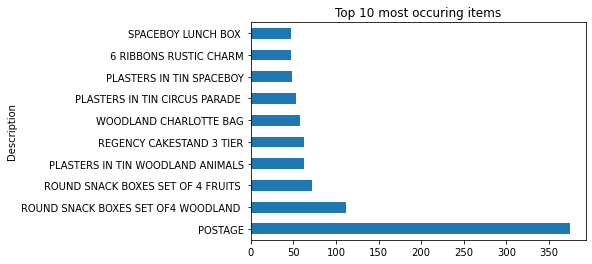

In [100]:
##showing the frequency of occurrence of the top 10 items in all transactions
transaction_final.sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')
plt.title('Top 10 most occuring items')

In [101]:
##Applying the Market Basket Analysis- used a min support of 2% cos i have a large dataset and it might
##take too long loading if i used less than 2% and i cant use too high than that cos it wont give me enough rules
##to work on.
mba = apriori(transaction_final, min_support=0.02, use_colnames=True)
mba

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0    0.024070                           (10 COLOUR SPACEBOY PEN)
1    0.021882                    (12 PENCIL SMALL TUBE WOODLAND)
2    0.032823                       (3 HOOK HANGER MAGIC GARDEN)
3    0.041575               (3 PIECE SPACEBOY COOKIE CUTTER SET)
4    0.024070                    (36 PENCILS TUBE RED RETROSPOT)
..        ...                                                ...
910  0.021882  (POSTAGE, SET OF 2 TEA TOWELS APPLE AND PEARS,...
911  0.035011  (POSTAGE, SPACEBOY LUNCH BOX , ROUND SNACK BOX...
912  0.024070  (STRAWBERRY LUNCH BOX WITH CUTLERY, POSTAGE, R...
913  0.035011  (POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS , ...
914  0.024070  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...

[915 rows x 2 columns]

In [102]:
##minning,if lift is greater than 1, it means the rules (items) didnt just occur together, they are something 
##people buy in reality. hence, the stores should place both items together.
rules=association_rules(mba, metric='lift', min_threshold=1)
rules

antecedents  \
0                                 (POSTAGE)   
1                  (10 COLOUR SPACEBOY PEN)   
2                                 (POSTAGE)   
3      (3 PIECE SPACEBOY COOKIE CUTTER SET)   
4     (ROUND SNACK BOXES SET OF4 WOODLAND )   
...                                     ...   
2433   (ROUND SNACK BOXES SET OF 4 FRUITS )   
2434  (ROUND SNACK BOXES SET OF4 WOODLAND )   
2435       (PLASTERS IN TIN CIRCUS PARADE )   
2436     (PLASTERS IN TIN WOODLAND ANIMALS)   
2437                              (POSTAGE)   

                                            consequents  antecedent support  \
0                              (10 COLOUR SPACEBOY PEN)            0.818381   
1                                             (POSTAGE)            0.024070   
2                  (3 PIECE SPACEBOY COOKIE CUTTER SET)            0.818381   
3                                             (POSTAGE)            0.041575   
4                  (3 PIECE SPACEBOY COOKIE CUTTER SET)            0.245077   
...                                                 ...                 ...   
2433  (PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE, RO...            0.157549   
2434  (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...            0.245077   
2435  (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...            0.115974   
2436  (ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE, ...            0.137856   
2437  (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...            0.818381   

      consequent support   support  confidence      lift  leverage  conviction  
0               0.024070  0.024070    0.029412  1.221925  0.004372    1.005504  
1               0.818381  0.024070    1.000000  1.221925  0.004372         inf  
2               0.041575  0.035011    0.042781  1.028990  0.000986    1.001259  
3               0.818381  0.035011    0.842105  1.028990  0.000986    1.150255  
4               0.041575  0.021882    0.089286  2.147556  0.011693    1.052388  
...                  ...       ...         ...       ...       ...         ...  
2433            0.032823  0.024070    0.152778  4.654630  0.018899    1.141586  
2434            0.026258  0.024070    0.098214  3.740327  0.017635    1.079793  
2435            0.039387  0.024070    0.207547  5.269392  0.019502    1.212202  
2436            0.039387  0.024070    0.174603  4.432981  0.018640    1.163819  
2437            0.026258  0.024070    0.029412  1.120098  0.002581    1.003249  

[2438 rows x 9 columns]

In [103]:
##sorting it by the confidence and lift- focusing on the top 10 rows
rules.sort_values(['confidence', 'lift'], ascending=[False, False]).reset_index(drop=True).iloc[:10]

antecedents  \
0                         (DOLLY GIRL CHILDRENS CUP)   
1                (POSTAGE, DOLLY GIRL CHILDRENS CUP)   
2                         (PINK VINTAGE SPOT BEAKER)   
3          (POSTAGE, SWEETHEART CERAMIC TRINKET BOX)   
4                 (DINOSAUR PARTY BAG + STICKER SET)   
5  (JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A...   
6                 (JUMBO BAG PINK POLKADOT, POSTAGE)   
7  (JUMBO BAG PINK POLKADOT, POSTAGE, JUMBO BAG W...   
8  (WOODLAND CHARLOTTE BAG, JUMBO BAG RED RETROSPOT)   
9  (POSTAGE, JUMBO BAG RED RETROSPOT, WOODLAND CH...   

                          consequents  antecedent support  consequent support  \
0         (DOLLY GIRL CHILDRENS BOWL)            0.024070            0.026258   
1         (DOLLY GIRL CHILDRENS BOWL)            0.021882            0.026258   
2          (BLUE VINTAGE SPOT BEAKER)            0.024070            0.030635   
3    (STRAWBERRY CERAMIC TRINKET BOX)            0.024070            0.052516   
4  (WOODLAND PARTY BAG + STICKER SET)            0.021882            0.067834   
5           (JUMBO BAG RED RETROSPOT)            0.026258            0.078775   
6           (JUMBO BAG RED RETROSPOT)            0.028446            0.078775   
7           (JUMBO BAG RED RETROSPOT)            0.024070            0.078775   
8        (JUMBO BAG WOODLAND ANIMALS)            0.024070            0.100656   
9        (JUMBO BAG WOODLAND ANIMALS)            0.021882            0.100656   

    support  confidence       lift  leverage  conviction  
0  0.024070         1.0  38.083333  0.023438         inf  
1  0.021882         1.0  38.083333  0.021307         inf  
2  0.024070         1.0  32.642857  0.023333         inf  
3  0.024070         1.0  19.041667  0.022806         inf  
4  0.021882         1.0  14.741935  0.020398         inf  
5  0.026258         1.0  12.694444  0.024190         inf  
6  0.028446         1.0  12.694444  0.026206         inf  
7  0.024070         1.0  12.694444  0.022174         inf  
8  0.024070         1.0   9.934783  0.021647         inf  
9  0.021882         1.0   9.934783  0.019679         inf

# TASK 3: Clustering

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn import metrics

In [105]:
#pip install yellowbrick

In [106]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\HP\anaconda3\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [107]:
Transfusion_data=pd.read_csv('transfusion.data.csv')

In [108]:
Transfusion_data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [109]:
Transfusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


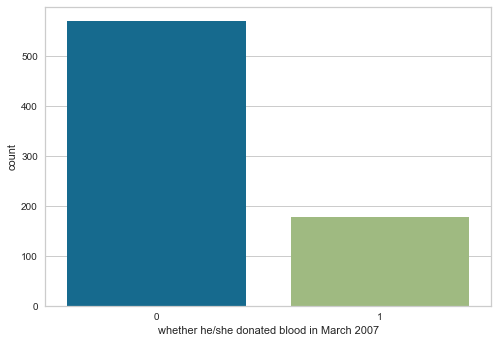

In [110]:
sns.countplot(x=Transfusion_data['whether he/she donated blood in March 2007'])
plt.show()

In [111]:
plt.figure(figsize=(15,8))

for plot in range(4):
    plt.subplot(2, 2, plot+1)
    sns.histplot(data=Transfusion_data, x=Transfusion_data.iloc[:, plot])
plt.show()

In [112]:
X= Transfusion_data.drop(['whether he/she donated blood in March 2007'], axis=1)

In [113]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [114]:
##using the scaled X for the dimensionality reduction
reducer=TSNE(n_components=2, random_state=10)
reduced=reducer.fit_transform(X_scaled)
tsne_components=pd.DataFrame(reduced, columns=['tsne1', 'tsne2'])
tsne_components.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne1      tsne2
0  8.497109  20.572769
1 -3.316956  17.998978
2 -0.802617  18.397003
3  4.742525  18.286501
4  6.558486  18.263269

In [115]:
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black')
plt.show()

In [116]:
##using another method of dimensionality reduction
pca=PCA(n_components=2)
reduced=pca.fit_transform(X_scaled)
pca_components=pd.DataFrame(reduced, columns=['PCA1', 'PCA2'])
pca_components.head()

PCA1      PCA2
0  10.698389 -1.143199
1   1.550642 -1.393216
2   2.309523 -1.257260
3   3.338733 -1.103198
4   4.837149 -0.828678

In [117]:
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='blue')
plt.show()

# K-means-getting the optimal number of clusters

In [118]:
import warnings
warnings.filterwarnings('ignore')

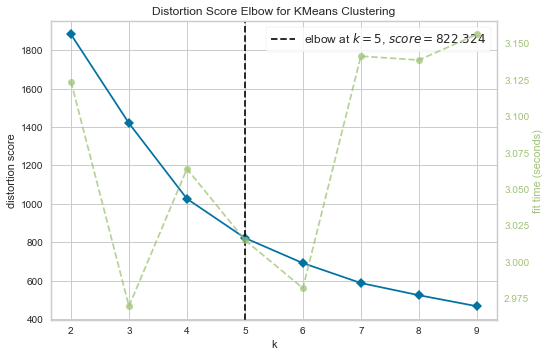

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
##USING THE SCALED X to get the optimal number of clusters
##there are different metrics used in selecting optimal number of clusters e.g silhouette, calinski_harabasz, 
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_scaled)
visualizer.show()

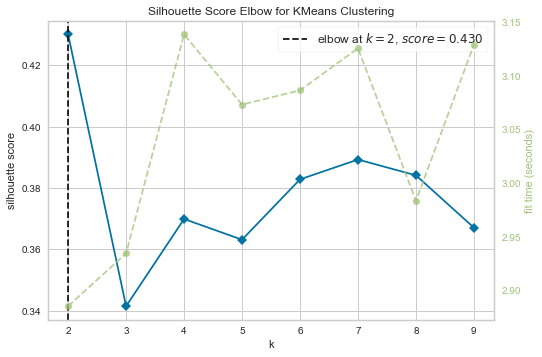

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [120]:
##based on our objectives, we will go with this since we are only looking at 2 groupings
##to group those who will donate from those who wont...based on the attributes we have.
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 10), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()

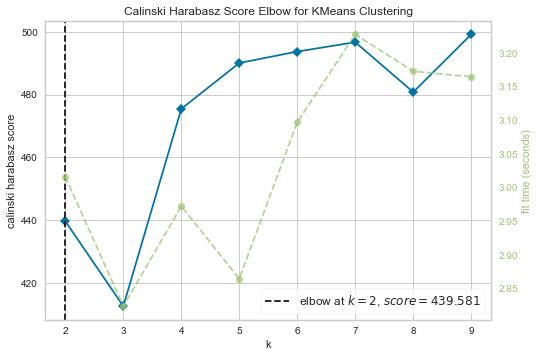

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [121]:
## and this also confirms the 2 clusters
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz')

visualizer.fit(X_scaled)
visualizer.show()

# K-means proper

In [122]:
##
cluster=KMeans(n_clusters=2, random_state=0)
clusters=cluster.fit_predict(X_scaled)

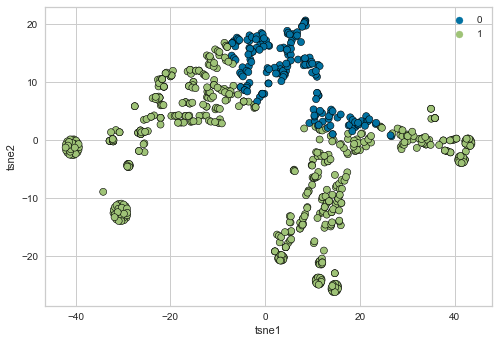

In [123]:
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=clusters)
plt.show()

In [124]:
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clusters)
plt.show()

In [125]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clusters)
plt.title('KMeans')

plt.subplot(122)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', 
                hue=Transfusion_data['whether he/she donated blood in March 2007'])
plt.title('True Value')

plt.show()

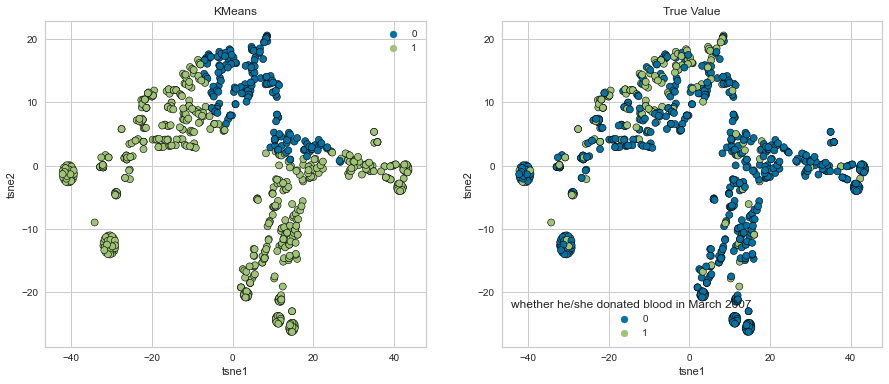

In [126]:
plt.figure(figsize=(15,6))

plt.subplot(121)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=clusters)
plt.title('KMeans')

plt.subplot(122)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', 
                hue=Transfusion_data['whether he/she donated blood in March 2007'])
plt.title('True Value')

plt.show()

In [127]:
## dbscan was avoided cos we have to keep changin the eps and the min_samples beofre we can gwt a satisfying cluster
##However, dbscan is good at detecting outliers

# Cluster 2- Agglomerative/Hierarchical clustering

In [128]:
##default number of clusters here is 2

In [129]:
Hie = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustershie=Hie.fit_predict(X_scaled)

In [130]:
np.unique(clustershie, return_counts=True)

(array([0, 1], dtype=int64), array([249, 499], dtype=int64))

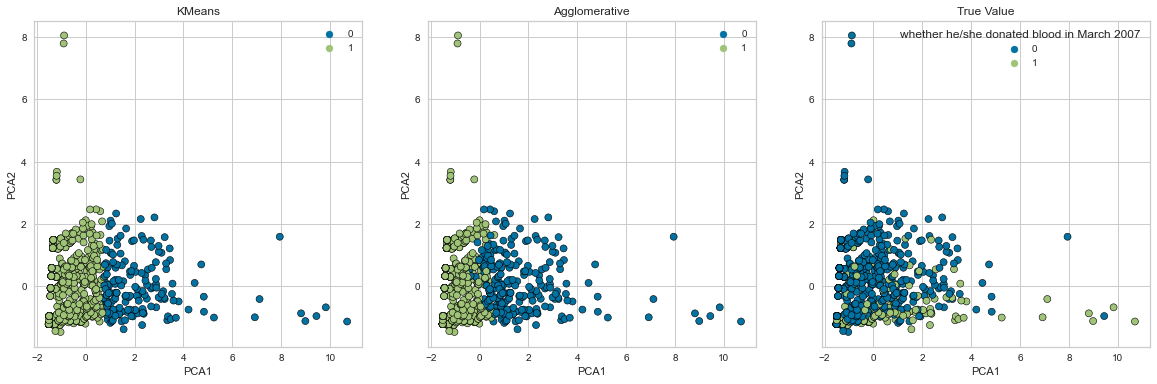

In [131]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clusters)
plt.title('KMeans')

plt.subplot(132)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', hue=clustershie)
plt.title('Agglomerative')

plt.subplot(133)
sns.scatterplot(x=pca_components.PCA1, y=pca_components.PCA2, edgecolor='black', 
                hue=Transfusion_data['whether he/she donated blood in March 2007'])
plt.title('True Value')

plt.show()

In [132]:
##visually(appearance), K-means is more appealing

In [133]:
## using metrics to judge
##silhouette takes values btw -1 and 1.
##the closer the value to 1, the better the cluster
sil_kmean=metrics.silhouette_score(X, clusters)
sil_hie=metrics.silhouette_score(X, clustershie)

print(f'Silhouette Score\n=================')
print(f'KMeans: {sil_kmean}')
print(f'Hierarchical: {sil_hie}')

Silhouette Score
KMeans: 0.6231763179952308
Hierarchical: 0.49514903497000895


In [134]:
##using the homogeneity-tells how the true clusters compares with the predicted one
##takes values between 0 and 1
print(metrics.homogeneity_score(Transfusion_data['whether he/she donated blood in March 2007'].values, clusters))
print(metrics.homogeneity_score(Transfusion_data['whether he/she donated blood in March 2007'].values, clustershie))

0.008562832946179265
0.00643493580590302


In [135]:
##using the completeness metrics
print(metrics.completeness_score(Transfusion_data['whether he/she donated blood in March 2007'].values, clusters))
print(metrics.completeness_score(Transfusion_data['whether he/she donated blood in March 2007'].values, clustershie))

0.00863700635052681
0.005550127837587491


In [136]:
## compiling all metrics into a single pipeline
def evaluation(y_true, y_fitted, X, model_name):
    
    Homo=metrics.homogeneity_score(y_true, y_fitted)
    Comp=metrics.completeness_score(y_true, y_fitted)
    Vmea=metrics.v_measure_score(y_true, y_fitted)
    AdjR=metrics.adjusted_rand_score(y_true, y_fitted)
    AdjM=metrics.adjusted_mutual_info_score(y_true, y_fitted)
    sil=metrics.silhouette_score(X, y_fitted)
    
    metric_value=[Homo, Comp, Vmea, AdjR, AdjM, sil]
    index=[
        'Homogeneity', 'Completeness', 'V-measure',
        'Adj. Rand Index', 'Adj. Mutual Information', 'Silhouette Score' 
    ]
    
    results=pd.DataFrame({
        model_name: metric_value
    }, index=index)
    
    return results

In [137]:
##comparing the performances of Kmeans and agglomerative with different metrics
KMeans_rslt=evaluation(y, clusters, X_scaled, 'KMeans')
Hei_rslt=evaluation(y, clustershie, X_scaled, 'Hierarchical')

performance=pd.concat([KMeans_rslt, Hei_rslt], axis=1)
performance

KMeans  Hierarchical
Homogeneity              0.008563      0.006435
Completeness             0.008637      0.005550
V-measure                0.008600      0.005960
Adj. Rand Index          0.048001      0.028561
Adj. Mutual Information  0.007380      0.004833
Silhouette Score         0.430032      0.386147

In [138]:
##plotting a chart of the metrics
performance.plot(kind='bar', figsize=(10, 6), fontsize=15)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.grid(False)
plt.show()

# Task 4: Text Mining and Sentiment Analysis

# Text Mining

In [140]:
import pandas as pd
import numpy as np ##picking random hotel numbers
import seaborn as sns 
from PIL import Image #to import the image for word cloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from textblob import TextBlob

In [141]:
import re
import spacy
from spacy.lang.en import STOP_WORDS
english_pipeline = spacy.load('en_core_web_sm')

In [142]:
##to import bag of words for checking frequency of words
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
Tourist_data=pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')

In [144]:
Tourist_data.info()
Tourist_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


ID               Review Date Location  \
0  rn579778340      Reviewed 1 week ago     Kathu   
1  rn576350875     Reviewed 3 weeks ago     Kathu   
2  rn574921678     Reviewed 4 weeks ago     Kathu   
3  rn572905503  Reviewed April 12, 2018     Kathu   
4  rn572364712  Reviewed April 10, 2018     Kathu   

           Hotel/Restaurant name  \
0  Thong Dee The Kathu Brasserie   
1  Thong Dee The Kathu Brasserie   
2  Thong Dee The Kathu Brasserie   
3  Thong Dee The Kathu Brasserie   
4  Thong Dee The Kathu Brasserie   

                                              Review  
0  Just been for sunday roast lamb and beef truly...  
1  Quietly set off the main road, nice atmosphere...  
2  I made a reservation for a birthday two days i...  
3  We visit here regularly and never fail to be i...  
4  Visited this wonderful place on my travels and...

In [145]:
##listing all locations in the data set
Tourist_data.Location.value_counts().index

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [146]:
##picking Patong Beach and specifying it
location_of_interest=[' Patong']


In [147]:
##viewing the hotels in the location
hotels_in_location =Tourist_data[Tourist_data.Location.isin(location_of_interest)]
hotels_in_location

ID             Review Date Location   Hotel/Restaurant name  \
793    rn578272599   Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794    rn576707124   Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795    rn576151146   Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796    rn575977118   Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797    rn574931000   Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   
...            ...                     ...      ...                     ...   
53639  rn162368197  Reviewed May 29, 2013    Patong                 Bite in   
53640  rn161843734  Reviewed May 25, 2013    Patong                 Bite in   
53641  rn161734077  Reviewed May 24, 2013    Patong                 Bite in   
53642  rn161218072  Reviewed May 19, 2013    Patong                 Bite in   
53643  rn161212765  Reviewed May 19, 2013    Patong                 Bite in   

                                                  Review  
793    its very expensive in comparison to other loca...  
794    We walked passed the holiday inn and decided a...  
795    An atmosphere of the 70's, great comfort of th...  
796    We made a reservation at the last minute to di...  
797    We had a very great time to celebrate my son b...  
...                                                  ...  
53639  I love this small restaurant, for the great fo...  
53640  We stopped at this restaurant after shopping a...  
53641  Great times ,This is one of the best restauran...  
53642  Bite in, it has become my favorite restaurant ...  
53643  The restaurant put in a good location in Jungc...  

[16403 rows x 5 columns]

In [148]:
len(hotels_in_location['Hotel/Restaurant name'].value_counts().index)

164

In [149]:
##checking the unique number of hotels 
len(hotels_in_location['Hotel/Restaurant name'].unique())

164

In [150]:
#picking random 30 hotels from this location, then seed it so that it doesnt change
np.random.seed(20)
random_30_hotels=np.random.choice(hotels_in_location['Hotel/Restaurant name'].unique(), 30, replace=False)
random_30_hotels

array(['The Orchids Restaurant', 'Blue Horizon - Top Quality Thai Food',
       "Sultan's Grill Authentic Turkish & Indian Cuisine",
       "Don's Bar B Q", 'No.6 Restaurant',
       'Bucintoro Pizzeria-Ristorante', 'Royal India Restaurant Patong',
       'Sabai Beach Restaurant', 'The Siam Mumbai', 'The Port',
       'Chez Nicolas', 'Madras Cafe 2 & Guest House', 'Sawasdee',
       'Patong Corner Restaurant', 'Da Mario', 'Pizzeria Da Moreno',
       'Coyote', 'Austrian Garden Restaurant',
       'Karon Cafe Steakhouse & Thai Cuisine', 'Kokosnuss',
       'The 9th Floor restaurant', 'Legends Sports Bar & Grill',
       'Song Pee Nong', 'Pizzeria Hut 1', 'Tandoor Phuket Indian',
       'Bite in', 'Home Kitchen, Bar & Bed',
       "Rosco's Restaurant & Sports Bar",
       'BYD Lofts Restaurant Bistro & Bar', 'Trattoria Capri da Rico'],
      dtype=object)

In [151]:
final_30 = Tourist_data[['Hotel/Restaurant name', 'Review']][Tourist_data['Hotel/Restaurant name'].isin(random_30_hotels)]
final_hotel=final_30.reset_index(drop=True)
final_hotel

Hotel/Restaurant name  \
0     Austrian Garden Restaurant   
1     Austrian Garden Restaurant   
2     Austrian Garden Restaurant   
3     Austrian Garden Restaurant   
4     Austrian Garden Restaurant   
...                          ...   
3225                     Bite in   
3226                     Bite in   
3227                     Bite in   
3228                     Bite in   
3229                     Bite in   

                                                 Review  
0     A few minutes walk from Patong beach, you can ...  
1     Food was fantastic from the classic cheeseburg...  
2     Visited here 3 times while on holiday for a we...  
3     This is most likely the best restaurant in Pat...  
4     the food and staff are great . Everyday you ca...  
...                                                 ...  
3225  I love this small restaurant, for the great fo...  
3226  We stopped at this restaurant after shopping a...  
3227  Great times ,This is one of the best restauran...  
3228  Bite in, it has become my favorite restaurant ...  
3229  The restaurant put in a good location in Jungc...  

[3230 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

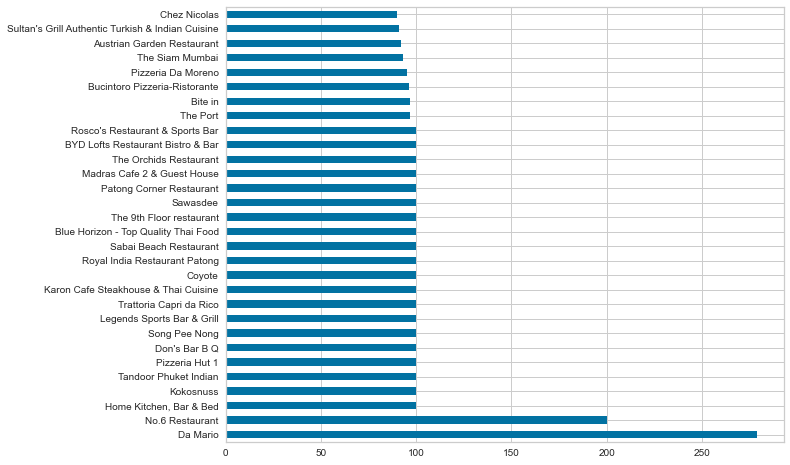

In [152]:
plt.figure(figsize=(10,8))
final_hotel['Hotel/Restaurant name'].value_counts().plot(kind='barh')
plt.show

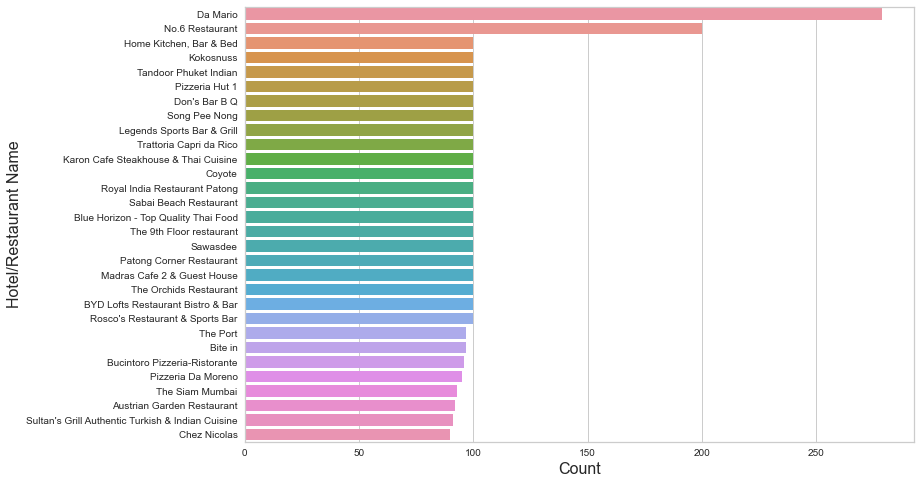

In [153]:
##plotting in descending order
plt.figure(figsize=(12, 8))
sns.countplot(y='Hotel/Restaurant name', data=final_hotel,
              order=final_hotel['Hotel/Restaurant name'].value_counts().index)
plt.ylabel('Hotel/Restaurant Name', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

##Data cleaning

In [154]:
final_hotel.Review

0       A few minutes walk from Patong beach, you can ...
1       Food was fantastic from the classic cheeseburg...
2       Visited here 3 times while on holiday for a we...
3       This is most likely the best restaurant in Pat...
4       the food and staff are great . Everyday you ca...
                              ...                        
3225    I love this small restaurant, for the great fo...
3226    We stopped at this restaurant after shopping a...
3227    Great times ,This is one of the best restauran...
3228    Bite in, it has become my favorite restaurant ...
3229    The restaurant put in a good location in Jungc...
Name: Review, Length: 3230, dtype: object

In [155]:
##definning the lemma
def lemmatizer(text):
    return [word.lemma_ for word in  english_pipeline(text)]

In [156]:
##cleaning the reviews-using regular expression and lemma... important in removing all except words
##also dropping stop words(it might make you think a review is positive when its actually negative)
##example, recommended.....not recommended. 'not' is a stop word
def data_cleaner(text: str) -> str:
    
    text=re.findall('[a-zA-Z]+', text) ## extract only alphabets in the reviews
    text=' '.join([c for c in text if len(c) >1]) ## joins them after extracting the alphabets
    text=text.lower() ## convert the texts to lower case
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    lemmatized = lemmatizer(text)
    cleaned= ' '.join(lemmatized)
    
    return cleaned

In [157]:
final_hotel.loc[:, 'Clean_Reviews'] = final_hotel.loc[:, 'Review'].apply(data_cleaner)

In [158]:
final_hotel.head()

Hotel/Restaurant name  \
0  Austrian Garden Restaurant   
1  Austrian Garden Restaurant   
2  Austrian Garden Restaurant   
3  Austrian Garden Restaurant   
4  Austrian Garden Restaurant   

                                              Review  \
0  A few minutes walk from Patong beach, you can ...   
1  Food was fantastic from the classic cheeseburg...   
2  Visited here 3 times while on holiday for a we...   
3  This is most likely the best restaurant in Pat...   
4  the food and staff are great . Everyday you ca...   

                                       Clean_Reviews  
0  minute walk patong beach stop hotel restaurant...  
1  food fantastic classic cheeseburgers spaghetti...  
2  visit times holiday week place feel like eaten...  
3  likely good restaurant patong robert taken kit...  
4  food staff great everyday choose special day b...

In [159]:
##checking frequent words in sparse matrix.
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(final_hotel['Clean_Reviews'])


In [160]:
new_df=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
new_df.head()

aa  aagya  aallllll  aalo  aamaze  ab  abd  abi  able  abroad  ...  yung  \
0   0      0         0     0       0   0    0    0     0       0  ...     0   
1   0      0         0     0       0   0    0    0     0       0  ...     0   
2   0      0         0     0       0   0    0    0     0       0  ...     0   
3   0      0         0     0       0   0    0    0     0       0  ...     0   
4   0      0         0     0       0   0    0    0     0       0  ...     0   

   yuri  yutube  yvonne  zealand  zero  zip  zona  zone  zucchini  
0     0       0       0        0     0    0     0     0         0  
1     0       0       0        0     0    0     0     0         0  
2     0       0       0        0     0    0     0     0         0  
3     0       0       0        0     0    0     0     0         0  
4     0       0       0        0     0    0     0     0         0  

[5 rows x 4487 columns]

In [161]:
##checking the top 20 most used words
new_df.sum(axis=0).sort_values(ascending=False)[:20]


food          2334
good          1793
restaurant    1174
great         1019
place          832
staff          752
service        733
pizza          648
thai           610
eat            605
nice           549
price          546
time           524
friendly       523
patong         510
visit          477
come           360
try            356
meal           355
recommend      344
dtype: int64

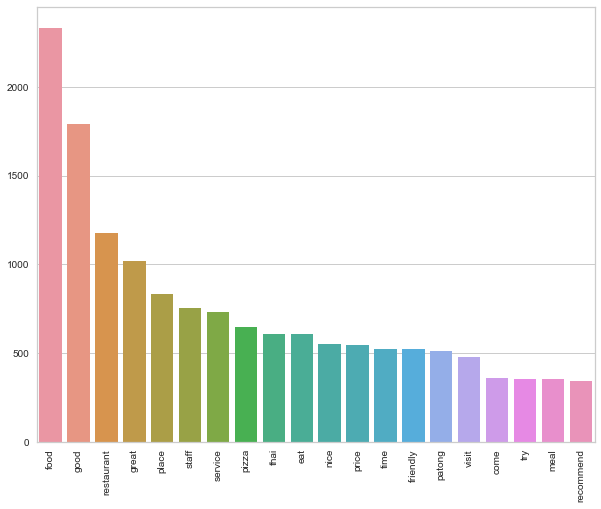

In [162]:
##plotting the top 20 most used words
plt.figure(figsize=(10, 8))
Top_20=new_df.sum(axis=0).sort_values(ascending=False)[:20]

sns.barplot(x=Top_20.index, y=Top_20.values)
plt.xticks(rotation=90)
plt.show()

In [163]:
##word cloud-installed package through anaconda prompt
text=' '.join(text for text in final_hotel.Clean_Reviews)


In [164]:
##creating the function that builds the word cloud
def plot_cloud(word_cloud):
    
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

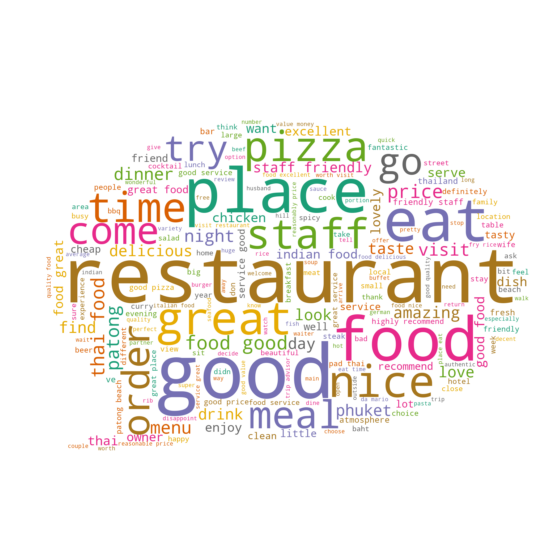

In [165]:
##embedding the frequent words in an image
comment=np.array(Image.open('comment.png'))
wc=WordCloud(background_color='white', 
             colormap='Dark2', random_state=10, collocations=True, mask=comment).generate(text)
plot_cloud(wc)

# Sentiment Analysis

In [166]:
##install textblob and import into jupyter
#defining pol and sub
ploarity= lambda review: TextBlob(review).sentiment.polarity #how negative is the comment
subjectivity= lambda review: TextBlob(review).sentiment.subjectivity #how subjective is the comment

In [167]:
final_hotel.loc[:, 'polarity']=final_hotel.loc[:, 'Clean_Reviews'].apply(ploarity)
final_hotel.loc[:, 'subjectivity']=final_hotel.loc[:, 'Clean_Reviews'].apply(subjectivity)

In [168]:
final_hotel.head()

Hotel/Restaurant name  \
0  Austrian Garden Restaurant   
1  Austrian Garden Restaurant   
2  Austrian Garden Restaurant   
3  Austrian Garden Restaurant   
4  Austrian Garden Restaurant   

                                              Review  \
0  A few minutes walk from Patong beach, you can ...   
1  Food was fantastic from the classic cheeseburg...   
2  Visited here 3 times while on holiday for a we...   
3  This is most likely the best restaurant in Pat...   
4  the food and staff are great . Everyday you ca...   

                                       Clean_Reviews  polarity  subjectivity  
0  minute walk patong beach stop hotel restaurant...  0.491667      0.533333  
1  food fantastic classic cheeseburgers spaghetti...  0.316667      0.638889  
2  visit times holiday week place feel like eaten...  0.500000      0.550000  
3  likely good restaurant patong robert taken kit...  0.340000      0.740000  
4  food staff great everyday choose special day b...  0.337302      0.620238

In [169]:
##classifying the polarity as pos, neg or neutral
final_hotel['Classification'] = 'Neutral'
final_hotel['Classification'] = np.where(final_hotel['polarity'] >= 0.05, 'positive', final_hotel['Classification'])
final_hotel['Classification'] = np.where(final_hotel['polarity'] <= -0.05, 'negative', final_hotel['Classification'])

In [170]:
final_hotel.head()

Hotel/Restaurant name  \
0  Austrian Garden Restaurant   
1  Austrian Garden Restaurant   
2  Austrian Garden Restaurant   
3  Austrian Garden Restaurant   
4  Austrian Garden Restaurant   

                                              Review  \
0  A few minutes walk from Patong beach, you can ...   
1  Food was fantastic from the classic cheeseburg...   
2  Visited here 3 times while on holiday for a we...   
3  This is most likely the best restaurant in Pat...   
4  the food and staff are great . Everyday you ca...   

                                       Clean_Reviews  polarity  subjectivity  \
0  minute walk patong beach stop hotel restaurant...  0.491667      0.533333   
1  food fantastic classic cheeseburgers spaghetti...  0.316667      0.638889   
2  visit times holiday week place feel like eaten...  0.500000      0.550000   
3  likely good restaurant patong robert taken kit...  0.340000      0.740000   
4  food staff great everyday choose special day b...  0.337302      0.620238   

  Classification  
0       positive  
1       positive  
2       positive  
3       positive  
4       positive

In [171]:
#counting the number of positives, negatives and neutral
final_hotel.Classification.value_counts(normalize=True)

positive    0.856347
Neutral     0.078638
negative    0.065015
Name: Classification, dtype: float64